# Set up

In [88]:
from footbot.data import utils
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Getting data

In [3]:
client = utils.set_up_bigquery(secrets_path='../secrets/service_account.json')

In [4]:
sql = \
'''
SELECT *
FROM `footbot-001.fpl.element_gameweeks_features_1819_v01`
'''

In [5]:
df = client.query(sql).to_dataframe()

In [6]:
len(list(df.columns))

349

# Analysing data

## Total points

In [7]:
df['total_points'].describe()

count    22240.000000
mean         1.423516
std          2.563286
min         -4.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         23.000000
Name: total_points, dtype: float64

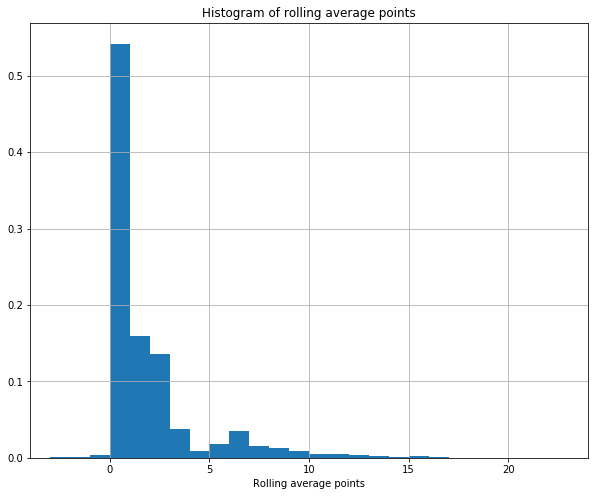

In [8]:
plt.figure(figsize=(10, 8))
plt.hist(
    df['total_points'],
    bins=range(-4, 24),
    density=True
)
plt.title('Histogram of rolling average points')
plt.xlabel('Rolling average points')
plt.grid()
plt.xlim(-4, 24)
plt.show()

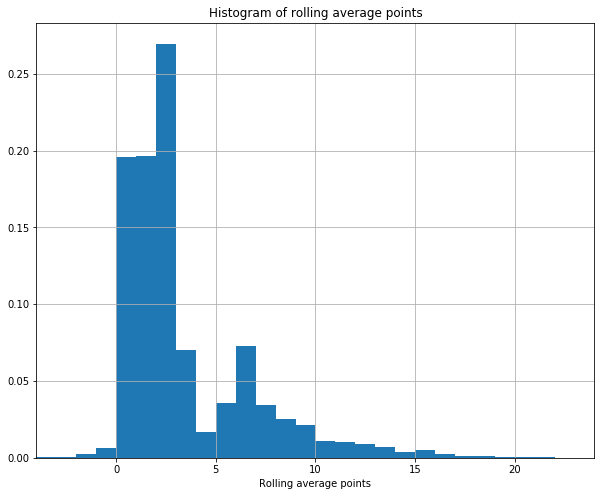

In [9]:
plt.figure(figsize=(10, 8))
plt.hist(
    df[df['rolling_avg_total_points_element'] >= 2.0]['total_points'],
    bins=range(-4, 24),
    density=True
)
plt.title('Histogram of rolling average points')
plt.xlabel('Rolling average points')
plt.grid()
plt.xlim(-4, 24)
plt.show()

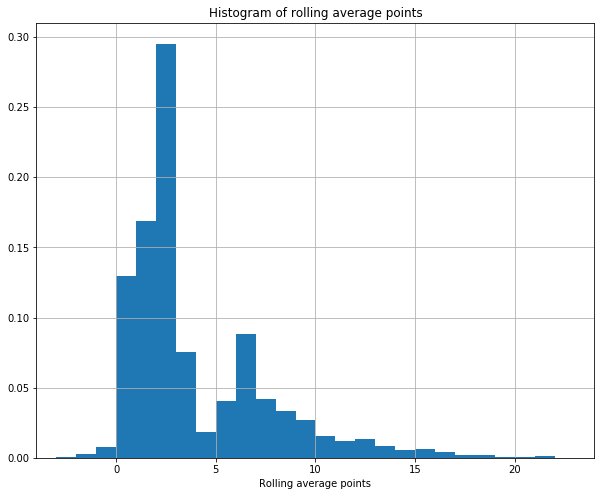

In [10]:
plt.figure(figsize=(10, 8))
plt.hist(
    df[df['rolling_avg_total_points_element'] >= 3.0]['total_points'],
    bins=range(-4, 24),
    density=True
)
plt.title('Histogram of rolling average points')
plt.xlabel('Rolling average points')
plt.grid()
plt.xlim(-4, 24)
plt.show()

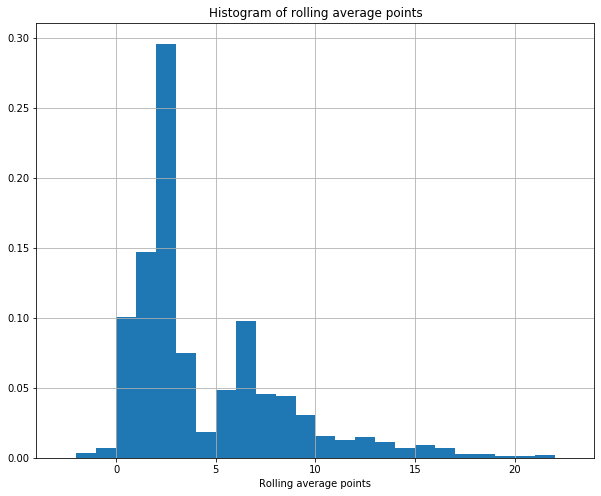

In [11]:
plt.figure(figsize=(10, 8))
plt.hist(
    df[df['rolling_avg_total_points_element'] >= 4.0]['total_points'],
    bins=range(-4, 24),
    density=True
)
plt.title('Histogram of rolling average points')
plt.xlabel('Rolling average points')
plt.grid()
plt.xlim(-4, 24)
plt.show()

In [12]:
df[
    df['safe_web_name'].isin([
        'salah',
        'sterling',
        'doherty',
        'aguero',
        'kante',
        'richarlison',
        'robertson',
        'ederson'
    ])
][[
    'safe_web_name',
    'team',
    'rolling_avg_total_points_element'
]].groupby(['safe_web_name', 'team']).describe()


rolling_avg_total_points_element                      \
                                                   count      mean       std   
safe_web_name team                                                             
aguero        man city                              39.0  5.698697  1.394737   
doherty       wolves                                38.0  3.871270  1.195410   
ederson       man city                              39.0  4.682029  0.789373   
kante         chelsea                               38.0  3.401155  0.851471   
richarlison   everton                               38.0  4.939718  1.967932   
robertson     liverpool                             37.0  6.135658  1.206976   
salah         liverpool                             37.0  6.786162  0.723769   
sterling      man city                              39.0  6.127043  0.851473   
              spurs                                 16.0  0.000000  0.000000   

                                                                            
                              min       25%       50%       75%        max  
safe_web_name team                                                          
aguero        man city   2.000000  4.950226  5.466667  6.376068  11.000000  
doherty       wolves     0.000000  3.659524  4.018519  4.457143   6.125000  
ederson       man city   4.000000  4.186957  4.428571  5.000000   8.000000  
kante         chelsea    2.777778  3.108784  3.225397  3.405032   8.000000  
richarlison   everton    3.714286  4.173214  4.356942  4.887255  14.000000  
robertson     liverpool  5.320000  5.516129  5.705882  6.000000  11.000000  
salah         liverpool  5.250000  6.384615  6.766667  7.210526   8.500000  
sterling      man city   3.000000  6.000000  6.250000  6.585784   7.428571  
              spurs      0.000000  0.000000  0.000000  0.000000   0.000000

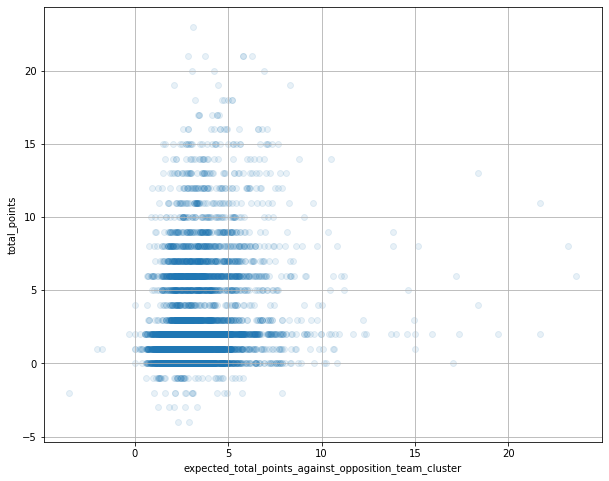

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['expected_total_points_against_opposition_team_cluster'],
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['total_points'],
    alpha=0.1
)

plt.xlabel('expected_total_points_against_opposition_team_cluster')
plt.ylabel('total_points')
plt.grid()
plt.show()

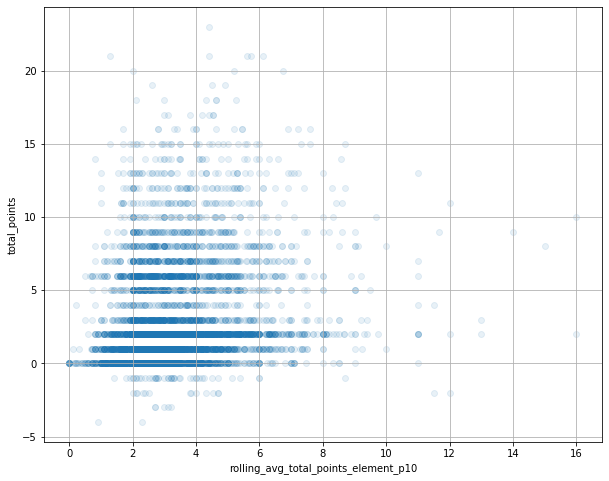

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['rolling_avg_total_points_element_p10'],
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['total_points'],
    alpha=0.1
)

plt.xlabel('rolling_avg_total_points_element_p10')
plt.ylabel('total_points')
plt.grid()
plt.show()

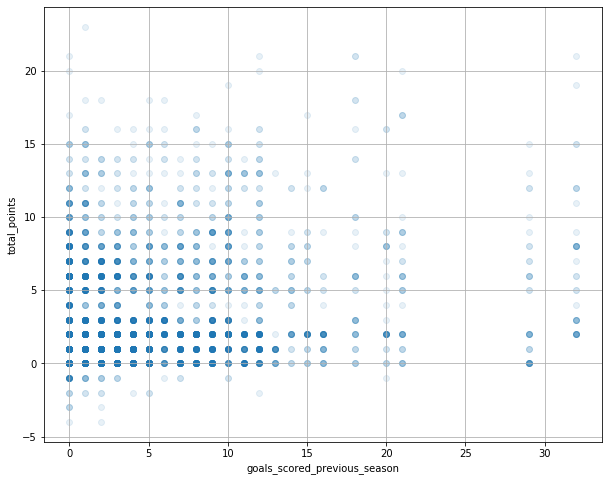

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['goals_scored_previous_season'],
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['total_points'],
    alpha=0.1
)

plt.xlabel('goals_scored_previous_season')
plt.ylabel('total_points')
plt.grid()
plt.show()

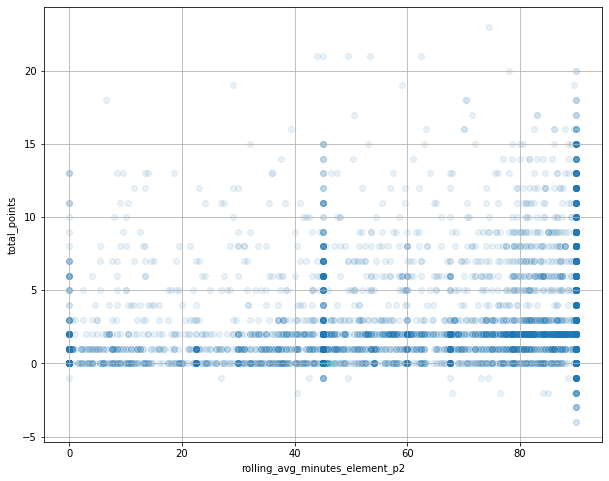

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['rolling_avg_minutes_element_p2'],
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['total_points'],
    alpha=0.1
)

plt.xlabel('rolling_avg_minutes_element_p2')
plt.ylabel('total_points')
plt.grid()
plt.show()

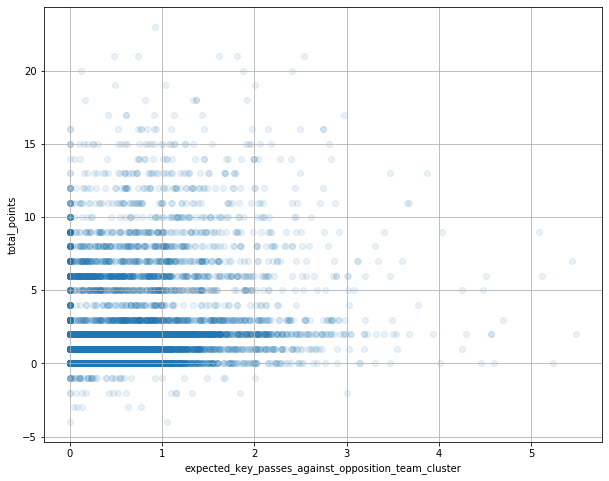

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df[df['rolling_avg_total_points_element'] >= 2.0]['expected_key_passes_against_opposition_team_cluster'],
    df[df['rolling_avg_total_points_element'] >= 2.0]['total_points'],
    alpha=0.1
)

plt.xlabel('expected_key_passes_against_opposition_team_cluster')
plt.ylabel('total_points')
plt.grid()
plt.show()

## Minutes

In [18]:
df[
    df['safe_web_name'].isin([
        'salah',
        'sterling',
        'doherty',
        'aguero',
        'kante',
        'richarlison',
        'robertson',
        'ederson'
    ])
][[
    'safe_web_name',
    'team',
    'rolling_avg_minutes_element'
]].groupby(['safe_web_name', 'team']).describe()


rolling_avg_minutes_element                       \
                                              count       mean       std   
safe_web_name team                                                         
aguero        man city                         39.0  65.823872  7.396709   
doherty       wolves                           38.0  85.367232  2.299075   
ederson       man city                         39.0  90.000000  0.000000   
kante         chelsea                          38.0  88.898399  1.570066   
richarlison   everton                          38.0  70.222221  8.454685   
robertson     liverpool                        37.0  84.037112  3.780145   
salah         liverpool                        37.0  84.694243  1.555558   
sterling      man city                         39.0  69.718850  5.939464   
              spurs                            16.0   0.000000  0.000000   

                                                                                
                               min        25%        50%        75%        max  
safe_web_name team                                                              
aguero        man city   55.277778  60.790064  63.344828  72.409091  83.250000  
doherty       wolves     79.000000  84.152586  85.507937  87.205357  90.000000  
ederson       man city   90.000000  90.000000  90.000000  90.000000  90.000000  
kante         chelsea    83.567568  89.132212  89.283333  90.000000  90.000000  
richarlison   everton    42.000000  70.258621  72.482143  74.202381  85.000000  
robertson     liverpool  78.000000  81.434783  83.206897  84.675676  90.000000  
salah         liverpool  81.000000  83.875000  84.931034  85.545455  88.666667  
sterling      man city   43.000000  68.608333  71.045455  71.780936  86.000000  
              spurs       0.000000   0.000000   0.000000   0.000000   0.000000

/home/tom/footbot/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/tom/footbot/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


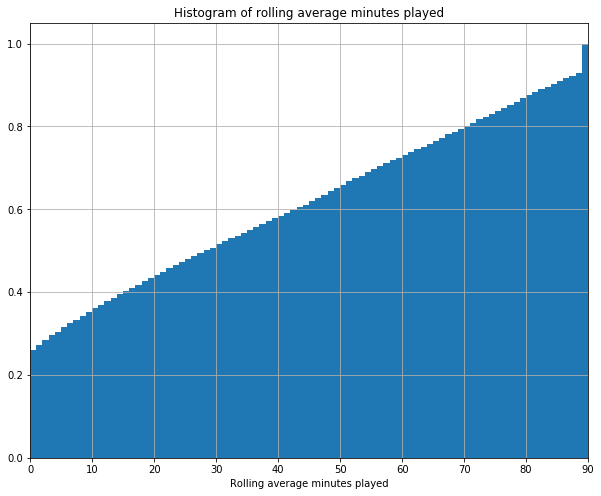

In [19]:
plt.figure(figsize=(10, 8))
plt.hist(df['rolling_avg_minutes_element'], bins=90, cumulative=True, density=True)
plt.title('Histogram of rolling average minutes played')
plt.xlabel('Rolling average minutes played')
plt.grid()
plt.xlim(0, 90)
plt.show()

## Rolling points

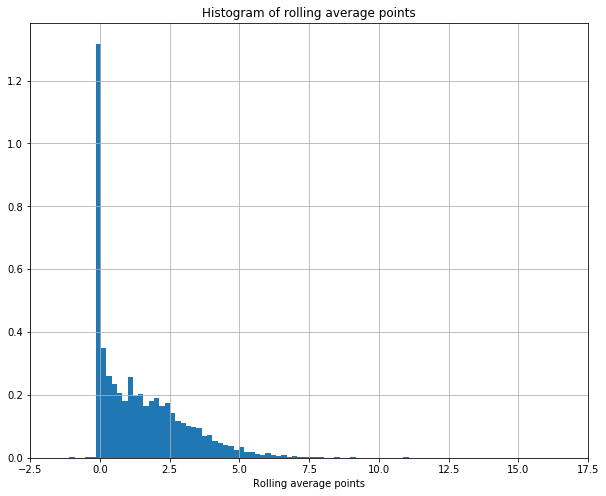

In [20]:
plt.figure(figsize=(10, 8))
plt.hist(
    df['rolling_avg_total_points_element'],
    bins=100,
    density=True
)
plt.title('Histogram of rolling average points')
plt.xlabel('Rolling average points')
plt.grid()
plt.xlim(-2.5, 17.5)
plt.show()

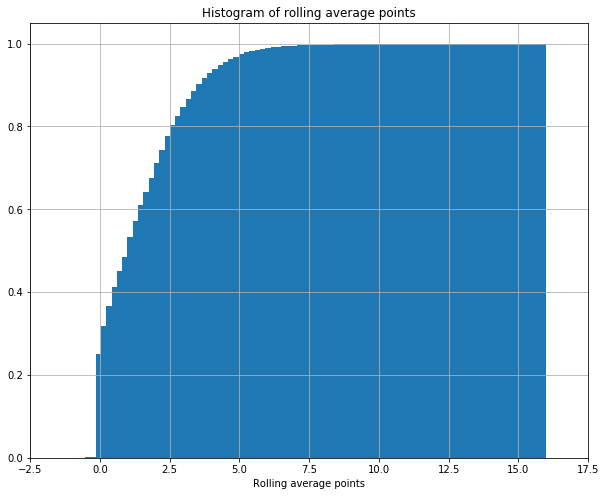

In [21]:
plt.figure(figsize=(10, 8))
plt.hist(
    df['rolling_avg_total_points_element'],
    bins=100,
    density=True,
    cumulative=True
)
plt.title('Histogram of rolling average points')
plt.xlabel('Rolling average points')
plt.grid()
plt.xlim(-2.5, 17.5)
plt.show()

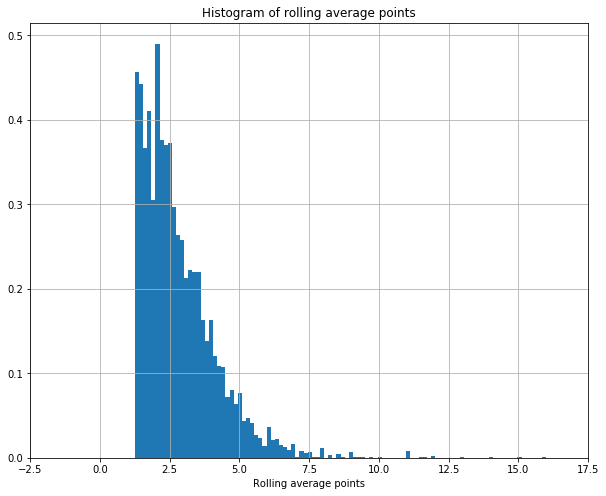

In [22]:
plt.figure(figsize=(10, 8))
plt.hist(
    df[
       df['rolling_avg_total_points_element'] > 1.25
    ]['rolling_avg_total_points_element'],
    bins=100,
    density=True
)
plt.title('Histogram of rolling average points')
plt.xlabel('Rolling average points')
plt.grid()
plt.xlim(-2.5, 17.5)
plt.show()

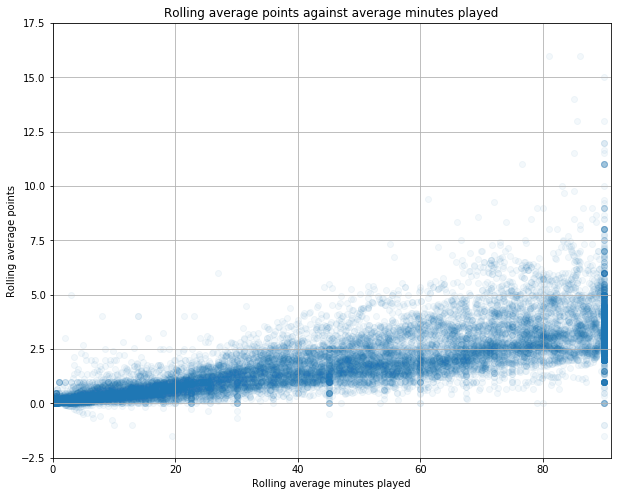

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df['rolling_avg_minutes_element'],
    df['rolling_avg_total_points_element'],
    alpha=0.05
)
plt.title('Rolling average points against average minutes played')
plt.ylabel('Rolling average points')
plt.xlabel('Rolling average minutes played')
plt.ylim(-2.5, 17.5)
plt.xlim(0, 91)
plt.grid()
plt.show()

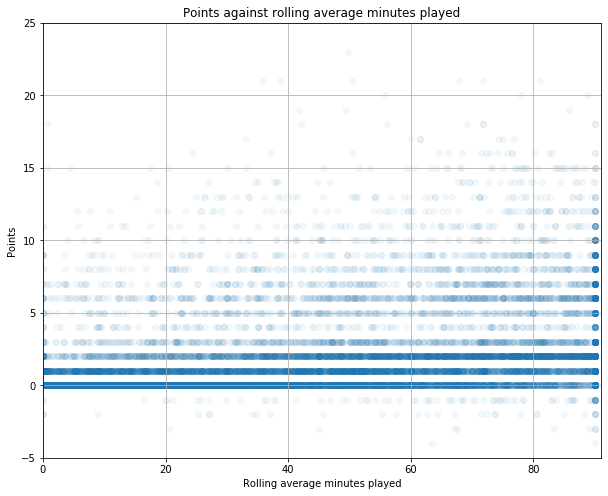

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df['rolling_avg_minutes_element'],
    df['total_points'],
    alpha=0.05
)
plt.title('Points against rolling average minutes played')
plt.ylabel('Points')
plt.xlabel('Rolling average minutes played')
plt.ylim(-5, 25)
plt.xlim(0, 91)
plt.grid()
plt.show()

## Correlation with points

### Minutes filtering

In [25]:
# greater than 0 minutes on average
df[
    df['rolling_avg_minutes_element'] > 0
].corrwith(
    df[
        df['rolling_avg_minutes_element'] > 0 
    ]['total_points']).sort_values(ascending=False)

total_points                                                                     1.000000
goals_scored                                                                     0.676183
minutes                                                                          0.575867
clean_sheets                                                                     0.552679
assists                                                                          0.444797
rolling_avg_minutes_element_p2                                                   0.386637
rolling_avg_total_points_element_p10                                             0.383993
rolling_avg_total_points_element_p9                                              0.382801
rolling_avg_total_points_element_p8                                              0.382363
rolling_avg_minutes_element_p3                                                   0.381703
rolling_avg_total_points_element_p11                                             0.381678
rolling_av

In [26]:
# greater than or equal 30 minutes on average
df[
    df['rolling_avg_minutes_element'] >= 30
].corrwith(
    df[
        df['rolling_avg_minutes_element'] >= 30 
    ]['total_points']).sort_values(ascending=False)

total_points                                                                     1.000000
goals_scored                                                                     0.685556
clean_sheets                                                                     0.519282
minutes                                                                          0.488828
assists                                                                          0.434790
rolling_avg_total_points_element_p10                                             0.280273
rolling_avg_total_points_element_p9                                              0.279005
rolling_avg_total_points_element_p8                                              0.278448
rolling_avg_total_points_element_p7                                              0.278025
rolling_avg_total_points_element_p11                                             0.276584
rolling_avg_total_points_element_p6                                              0.275927
rolling_av

In [27]:
# greater than or equal 45 minutes on average
df[
    df['rolling_avg_minutes_element'] >= 45
].corrwith(
    df[
        df['rolling_avg_minutes_element'] >= 45
    ]['total_points']).sort_values(ascending=False)

total_points                                                                     1.000000
goals_scored                                                                     0.679286
clean_sheets                                                                     0.520626
minutes                                                                          0.452805
assists                                                                          0.423074
rolling_avg_total_points_element_p10                                             0.251496
rolling_avg_total_points_element_p9                                              0.249906
rolling_avg_total_points_element_p8                                              0.248472
expected_total_points_against_opposition_team_cluster                            0.248103
rolling_avg_total_points_element_p16                                             0.248003
rolling_avg_total_points_element_p7                                              0.247162
rolling_av

In [28]:
# greater than or equal 60 minutes on average
df[
    df['rolling_avg_minutes_element'] >= 60
].corrwith(
    df[
        df['rolling_avg_minutes_element'] >= 60 
    ]['total_points']).sort_values(ascending=False)

total_points                                                                     1.000000
goals_scored                                                                     0.669856
clean_sheets                                                                     0.526017
assists                                                                          0.418460
minutes                                                                          0.405080
value                                                                            0.251628
expected_total_points_against_opposition_team_cluster                            0.225047
expected_total_points_against_opposition_team_element_type                       0.221893
goals_scored_previous_season                                                     0.221192
rolling_avg_total_points_element_p10                                             0.219952
rolling_avg_total_points_element_p9                                              0.219205
rolling_av

### Rolling points filtering

#### 0.5

In [29]:
# greater than or equal 0.5 points on average
df[
    df['rolling_avg_total_points_element'] >= 0.5
].corrwith(
    df[
        df['rolling_avg_total_points_element'] >= 0.5
    ]['total_points']).sort_values(ascending=False)

total_points                                                                     1.000000
goals_scored                                                                     0.683814
minutes                                                                          0.534584
clean_sheets                                                                     0.530227
assists                                                                          0.438354
rolling_avg_total_points_element_p10                                             0.324484
rolling_avg_minutes_element_p2                                                   0.324150
rolling_avg_total_points_element_p9                                              0.323228
rolling_avg_total_points_element_p8                                              0.323009
rolling_avg_total_points_element_p7                                              0.321689
rolling_avg_total_points_element_p11                                             0.321571
rolling_av

#### 1.0

In [30]:
# greater than or equal 1.0 points on average
df[
    df['rolling_avg_total_points_element'] >= 1.0
].corrwith(
    df[
        df['rolling_avg_total_points_element'] >= 1.0
    ]['total_points']).sort_values(ascending=False)

total_points                                                                     1.000000
goals_scored                                                                     0.688066
clean_sheets                                                                     0.517461
minutes                                                                          0.503776
assists                                                                          0.437221
rolling_avg_total_points_element_p10                                             0.284392
rolling_avg_total_points_element_p9                                              0.282727
rolling_avg_total_points_element_p8                                              0.282356
rolling_avg_total_points_element_p7                                              0.281391
rolling_avg_total_points_element_p11                                             0.280820
rolling_avg_minutes_element_p2                                                   0.280432
rolling_av

#### 1.5

In [31]:
# greater than or equal 1.5 points on average
df[
    df['rolling_avg_total_points_element'] >= 1.5
].corrwith(
    df[
        df['rolling_avg_total_points_element'] >= 1.5
    ]['total_points']).sort_values(ascending=False)

total_points                                                                     1.000000
goals_scored                                                                     0.696293
clean_sheets                                                                     0.502669
minutes                                                                          0.472182
assists                                                                          0.436413
rolling_avg_total_points_element_p10                                             0.248498
rolling_avg_total_points_element_p9                                              0.246788
rolling_avg_total_points_element_p8                                              0.245857
rolling_avg_total_points_element_p7                                              0.244422
rolling_avg_total_points_element_p11                                             0.243601
rolling_avg_minutes_element_p2                                                   0.241906
rolling_av

#### 2.0

##### Outfield

In [32]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([2, 3, 4]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))

    ]['total_points']).sort_values(ascending=False)

total_points                                                                     1.000000
goals_scored                                                                     0.740063
assists                                                                          0.464923
clean_sheets                                                                     0.457564
minutes                                                                          0.443763
value                                                                            0.213949
expected_total_points_against_opposition_team_cluster                            0.211703
rolling_avg_first_team_p1                                                        0.209440
expected_total_points_against_opposition_team_element_type                       0.206762
rolling_avg_total_points_element_p10                                             0.206165
rolling_avg_first_team_p2                                                        0.204195
rolling_av

##### Keeper

In [33]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([1]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([1]))

    ]['total_points']).sort_values(ascending=False)

total_points                                                                     1.000000
clean_sheets                                                                     0.805205
saves                                                                            0.430231
minutes                                                                          0.400985
rolling_avg_minutes_element_p1                                                   0.336810
rolling_avg_minutes_element_p2                                                   0.333117
rolling_avg_minutes_element_p3                                                   0.322267
rolling_avg_minutes_element_p4                                                   0.317614
rolling_avg_minutes_element_p7                                                   0.311254
rolling_avg_minutes_element_p8                                                   0.310412
rolling_avg_minutes_element_p6                                                   0.309895
rolling_av

## Correlation with goals scored

In [34]:
# greater than or equal 2.0 points on average
# goals_cols = [
    
# ]

df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([2, 3, 4]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['goals_scored']).sort_values(ascending=False)

goals_scored                                                                     1.000000
total_points                                                                     0.740063
goals_scored_per_minute_previous_season                                          0.288620
goals_scored_previous_season                                                     0.282223
value                                                                            0.269285
element_type                                                                     0.221015
rolling_avg_goals_scored_element                                                 0.211846
rolling_avg_goals_scored_element_p20                                             0.211517
rolling_avg_goals_scored_element_p19                                             0.210313
rolling_avg_goals_scored_element_p16                                             0.210083
rolling_avg_offside_element                                                      0.209612
rolling_av

## Correlation with assists

In [35]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([2, 3, 4]))

].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))

    ]['assists']).sort_values(ascending=False)

assists                                                                          1.000000
total_points                                                                     0.464923
expected_key_passes_against_opposition_team_element_type                         0.157382
minutes                                                                          0.153195
expected_key_passes_against_opposition_team_cluster                              0.152738
rolling_avg_key_passes_element                                                   0.152694
value                                                                            0.134900
rolling_avg_key_passes_per_minute_element                                        0.134850
expected_assists_against_opposition_team_cluster                                 0.133232
rolling_avg_tackled_element                                                      0.131326
expected_total_points_against_opposition_team_element_type                       0.130486
expected_t

## Correlation with clean sheets

In [36]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([2, 3, 4]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['clean_sheets']).sort_values(ascending=False)

clean_sheets                                                                     1.000000
total_points                                                                     0.457564
minutes                                                                          0.315377
expected_attempted_passes_against_opposition_team_element_type                   0.153127
expected_completed_passes_against_opposition_team_element_type                   0.152649
expected_attempted_passes_against_opposition_team_cluster                        0.151942
expected_completed_passes_against_opposition_team_cluster                        0.150690
expected_bps_against_opposition_team_cluster                                     0.145444
expected_bps_against_opposition_team_element_type                                0.144782
expected_total_points_against_opposition_team_cluster                            0.133405
rolling_avg_minutes_element_p2                                                   0.129160
rolling_av

In [37]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([1]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([1]))
    ]['clean_sheets']).sort_values(ascending=False)

clean_sheets                                                                     1.000000
total_points                                                                     0.805205
rolling_avg_completed_passes_element                                             0.229381
value                                                                            0.225779
expected_completed_passes_against_opposition_team_element_type                   0.222388
expected_completed_passes_against_opposition_team_cluster                        0.222388
minutes                                                                          0.208356
clean_sheets_previous_season                                                     0.202923
rolling_avg_minutes_element_p1                                                   0.195063
rolling_avg_minutes_element_p3                                                   0.184042
rolling_avg_minutes_element_p2                                                   0.183864
clean_shee

## Correlation with goals conceded

In [38]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([2, 3, 4]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['goals_conceded']).sort_values(ascending=False)

goals_conceded                                                                   1.000000
minutes                                                                          0.442732
expected_goals_conceded_against_opposition_team_element_type                     0.304539
expected_goals_conceded_against_opposition_team_cluster                          0.302290
rolling_avg_minutes_element_p2                                                   0.251703
rolling_avg_minutes_element_p3                                                   0.250187
rolling_avg_minutes_element_p4                                                   0.247477
rolling_avg_minutes_element_p1                                                   0.246147
rolling_avg_minutes_element_p5                                                   0.239893
rolling_avg_minutes_element_p6                                                   0.234834
rolling_avg_minutes_element_p8                                                   0.231859
rolling_av

In [39]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([1]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([1]))
    ]['goals_conceded']).sort_values(ascending=False)

goals_conceded                                                                   1.000000
minutes                                                                          0.353875
expected_saves_against_opposition_team_element_type                              0.279147
expected_saves_against_opposition_team_cluster                                   0.279147
rolling_avg_minutes_element_p1                                                   0.277332
rolling_avg_minutes_element_p2                                                   0.271964
rolling_avg_saves_element_p9                                                     0.268894
rolling_avg_saves_element_p4                                                     0.267525
rolling_avg_saves_element_p8                                                     0.265731
rolling_avg_saves_element_p10                                                    0.260292
rolling_avg_minutes_element_p3                                                   0.257604
rolling_av

## Correlation with saves

In [40]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([1]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([1]))
    ]['saves']).sort_values(ascending=False)

saves                                                                            1.000000
minutes                                                                          0.431278
total_points                                                                     0.430231
rolling_avg_minutes_element_p2                                                   0.341963
rolling_avg_minutes_element_p3                                                   0.333064
rolling_avg_minutes_element_p4                                                   0.328687
rolling_avg_minutes_element_p5                                                   0.323157
rolling_avg_minutes_element_p6                                                   0.320360
rolling_avg_minutes_element_p7                                                   0.319501
rolling_avg_minutes_element_p1                                                   0.318904
rolling_avg_minutes_element_p8                                                   0.317124
rolling_av

## Correlation with minutes

In [41]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([2, 3, 4]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([2, 3, 4]))
    ]['minutes']).sort_values(ascending=False)

minutes                                                                          1.000000
rolling_avg_minutes_element_p2                                                   0.501426
rolling_avg_minutes_element_p3                                                   0.484454
rolling_avg_minutes_element_p1                                                   0.484273
rolling_avg_minutes_element_p4                                                   0.470569
rolling_avg_minutes_element_p5                                                   0.458909
rolling_avg_minutes_element_p6                                                   0.448940
total_points                                                                     0.443763
goals_conceded                                                                   0.442732
rolling_avg_minutes_element_p7                                                   0.439519
rolling_avg_minutes_element_p8                                                   0.436810
rolling_av

In [42]:
# greater than or equal 2.0 points on average
df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([1]))
].corrwith(
    df[
        (df['rolling_avg_total_points_element'] >= 2.0)
        & (df['element_type'].isin([1]))
    ]['minutes']).sort_values(ascending=False)

minutes                                                                          1.000000
rolling_avg_minutes_element_p1                                                   0.816204
rolling_avg_minutes_element_p2                                                   0.798864
rolling_avg_minutes_element_p3                                                   0.777250
rolling_avg_minutes_element_p4                                                   0.759250
rolling_avg_minutes_element_p5                                                   0.742578
rolling_avg_minutes_element_p6                                                   0.737031
rolling_avg_minutes_element_p7                                                   0.728607
rolling_avg_minutes_element_p8                                                   0.717996
rolling_avg_minutes_element_p9                                                   0.703846
rolling_avg_minutes_element_p10                                                  0.691405
rolling_av

## Correlation of features

### Outfield points

In [127]:
outfield_points_cols = [
'value',
'expected_total_points_against_opposition_team_element_type',
'rolling_avg_first_team_p1',
'rolling_avg_total_points_element_p10',
# 'rolling_avg_total_points_element',
# 'rolling_avg_squad_p1',
# 'goals_scored_previous_season',
'rolling_avg_minutes_element_p1',
# 'rolling_avg_minutes_element_p2',
# 'goals_scored_per_minute_previous_season',
'total_points_previous_season',
# 'expected_bps_against_opposition_team_element_type',
# 'bonus_previous_season',
'rolling_avg_goals_scored_element_p10',
'bonus_per_minute_previous_season',
'rolling_avg_vice_or_captain_p3',
'expected_clean_sheets_against_opposition_team_element_type',
'expected_goals_scored_against_opposition_team_element_type',
'rolling_avg_bps_element',
'rolling_avg_assists_element_p7',
'rolling_avg_bonus_element',
'expected_bonus_against_opposition_team_element_type',
# 'rolling_avg_captain',
'assists_previous_season',
'rolling_avg_clean_sheets_element_p2',
'rolling_avg_clean_sheets_element',
# 'rolling_avg_assists_element',
# 'expected_minutes_against_opposition_team_element_type',
# 'assists_per_minute_previous_season',
'rolling_avg_minutes_element',
'expected_assists_against_opposition_team_element_type',
# 'bps_previous_season',
# 'clean_sheets_previous_season',
# 'rolling_avg_clean_sheets_per_minute_element',
'element_type',
'was_home',
'total_points_per_minute_previous_season',
'rolling_avg_bonus_per_minute_element',
'clean_sheets_per_minute_previous_season',
'rolling_avg_penalties_missed_element',
# 'rolling_avg_penalties_missed_per_minute_element',
'penalties_missed_previous_season',
# 'bps_per_minute_previous_season',
'rolling_avg_goals_conceded_element_p1',
# 'penalties_missed_per_minute_previous_season',
'rolling_avg_assists_per_minute_element',
'rolling_avg_total_points_per_minute_element',
'expected_penalties_missed_against_opposition_team_element_type',
# 'red_cards_per_minute_previous_season',
# 'rolling_avg_goals_scored_per_minute_element',
'minutes_previous_season',
'red_cards_previous_season',
# 'rolling_avg_goals_conceded_element_p15',
'expected_penalties_conceded_against_opposition_team_element_type',
'own_goals_previous_season',
'was_weekday',
# 'rolling_avg_penalties_conceded_element',
'rolling_avg_penalties_conceded_per_minute_element',
# 'rolling_avg_yellow_cards_element',
'expected_yellow_cards_against_opposition_team_element_type',
# 'goals_conceded_previous_season',
'expected_own_goals_against_opposition_team_element_type',
'was_late',
# 'rolling_avg_goals_conceded_element',
'rolling_avg_yellow_cards_per_minute_element',
'goals_conceded_per_minute_previous_season',
'yellow_cards_previous_season',
'rolling_avg_goals_conceded_per_minute_element',
'yellow_cards_per_minute_previous_season',
'expected_goals_conceded_against_opposition_team_element_type',
]

In [126]:
outfield_points_corr = df[
    (df['rolling_avg_total_points_element'] >= 2.0)
    & (df['element_type'].isin([2, 3, 4]))
][outfield_points_cols].corr()
outfield_points_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [143]:
# get this working!
outfield_points_vif = pd.DataFrame()
outfield_points_vif['vif'] = \
[
    variance_inflation_factor(
        df[
            (df['rolling_avg_total_points_element'] >= 2.0)
            & (df['element_type'].isin([2, 3, 4]))
        ][outfield_points_cols].dropna().to_numpy(),
        i
    )
    for i in range(0, len(outfield_points_cols))
]

outfield_points_vif['features'] = outfield_points_cols

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [134]:
?variance_inflation_factor

In [137]:
variance_inflation_factor(
        df[
            (df['rolling_avg_total_points_element'] >= 2.0)
            & (df['element_type'].isin([2, 3, 4]))
        ][outfield_points_cols].to_numpy(),
        0
    )

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [131]:
?variance_inflation_factor

In [133]:
outfield_points_cols

['value',
 'expected_total_points_against_opposition_team_element_type',
 'rolling_avg_first_team_p1',
 'rolling_avg_total_points_element_p10',
 'rolling_avg_minutes_element_p1',
 'total_points_previous_season',
 'rolling_avg_goals_scored_element_p10',
 'bonus_per_minute_previous_season',
 'rolling_avg_vice_or_captain_p3',
 'expected_clean_sheets_against_opposition_team_element_type',
 'expected_goals_scored_against_opposition_team_element_type',
 'rolling_avg_bps_element',
 'rolling_avg_assists_element_p7',
 'rolling_avg_bonus_element',
 'expected_bonus_against_opposition_team_element_type',
 'assists_previous_season',
 'rolling_avg_clean_sheets_element_p2',
 'rolling_avg_clean_sheets_element',
 'rolling_avg_minutes_element',
 'expected_assists_against_opposition_team_element_type',
 'element_type',
 'was_home',
 'total_points_per_minute_previous_season',
 'rolling_avg_bonus_per_minute_element',
 'clean_sheets_per_minute_previous_season',
 'rolling_avg_penalties_missed_element',
 'pen